<h1>Table of Contents<span class="tocSkip"></span></h1>
	<div class="toc">
		<ul class="toc-item">
			<li><span><a href="#Magnitude(Spectrum)" data-toc-modified-id="Magnitude(Spectrum)-1">Magnitude(Spectrum)</a></span></li>
			<li><span><a href="#Apply-Filter" data-toc-modified-id="Apply-Filter-2">Apply Filter</a></span></li>
			<li><span><a href="#Ideal-Filter" data-toc-modified-id="Ideal-Filter-3">Ideal Filter</a></span>
				<ol type=I class="toc-item">
					<li><span><a href="#Ideal-Low-Pass-Filter" data-toc-modified-id="Ideal-Low-Pass-Filter-3.1">Ideal Low Pass Filter</a></span></li>
					<li><span><a href="#Ideal-High-Pass-Filter" data-toc-modified-id="Ideal-High-Pass-Filter-3.2">Ideal High Pass Filter</a></span></li>
				</ol>
			</li>
			<li><span><a href="#Butterworth-Filter" data-toc-modified-id="Butterworth-Filter-4">Butterworth Filter</a></span>
				<ol type=I class="toc-item">
					<li><span><a href="#Butterworth-Low-Pass-Filter" data-toc-modified-id="Butterworth-Low-Pass-Filter-4.1">Butterworth Low Pass Filter</a></span></li>
					<li><span><a href="#Butterworth-High-Pass-Filter" data-toc-modified-id="Butterworth-High-Pass-Filter-4.2">Butterworth High Pass Filter</a></span></li>
				</ol>
			</li>
			<li><span><a href="#Gaussian-Filter" data-toc-modified-id="Gaussian-Filter-5">Gaussian Filter</a></span>
				<ol type=I class="toc-item">
					<li><span><a href="#Gaussian-Low-Pass-Filter" data-toc-modified-id="Gaussian-Low-Pass-Filter-5.1">Gaussian Low Pass Filter</a></span></li>
					<li><span><a href="#Gaussian-High-Pass-Filter" data-toc-modified-id="Gaussian-High-Pass-Filter-5.2">Gaussian High Pass Filter</a></span></li>
				</ol>
			</li>
			<li><span><a href="#Laplacian-Filter" data-toc-modified-id="Laplacian-Filter-6">Laplacian Filter</a></span></li>
		</ul>
	</div>

In [1]:
import cv2
import numpy as np
import math
from numpy.fft import fft2,fftshift,ifft2,ifftshift
from matplotlib import pyplot as plt

## Magnitude(Spectrum)

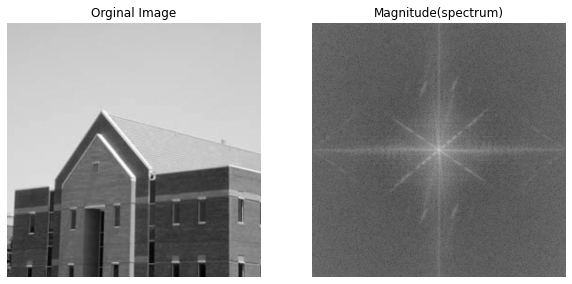

In [24]:
OrginalImage = cv2.imread('MS.jpg',0)

plt.figure(figsize=(10,10))


magnitudeSpectrum_Img = 20*np.log(
                           np.abs(
                           np.fft.fftshift(
                           np.fft.fft2(
                                      OrginalImage))))
plt.subplot(121)
plt.imshow(OrginalImage, cmap = 'gray')
plt.title('Orginal Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitudeSpectrum_Img, cmap = 'gray')
plt.title('Magnitude(spectrum)')
plt.axis('off')
plt.show()

## Apply Filter

In [16]:
def applyFilter(img,H):
    row,col=img.shape
    Matrix=np.zeros((row,col))
    n=1
    for i in range(row):
        for j in range(col):
            Matrix[i,j]=n
            n=-n
        n=-n
    return np.real(ifftshift(
                   ifft2(
                   fft2(
                   fftshift(img*Matrix)
                                 )
                                 *H
                                 )
                                 )*Matrix
                                 )

## Ideal Filter

In [17]:
def idealFilter(img,D0,lowpass=True):
    row,col=img.shape
    rowsIndex=np.zeros((row,col))
    colsIndex=np.zeros((row,col))
    if row == col :
        for i in range(row):
            for j in range(col):
                rowsIndex[i,j]=i
        colsIndex=rowsIndex.T
    else:
        for i in range(row):
            for j in range(col):
                rowsIndex[i,j]=i 
                colsIndex[i,j]=j
    D=np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            D[i,j]=np.sqrt(pow((rowsIndex[i,j]-row//2),2)+pow((colsIndex[i,j]-col//2),2))
    if lowpass:
        L=np.heaviside(-1*(D-D0),1)
        return L
    else:
        H=np.heaviside(1*(D-D0),1)
        return H

### Ideal Low Pass Filter

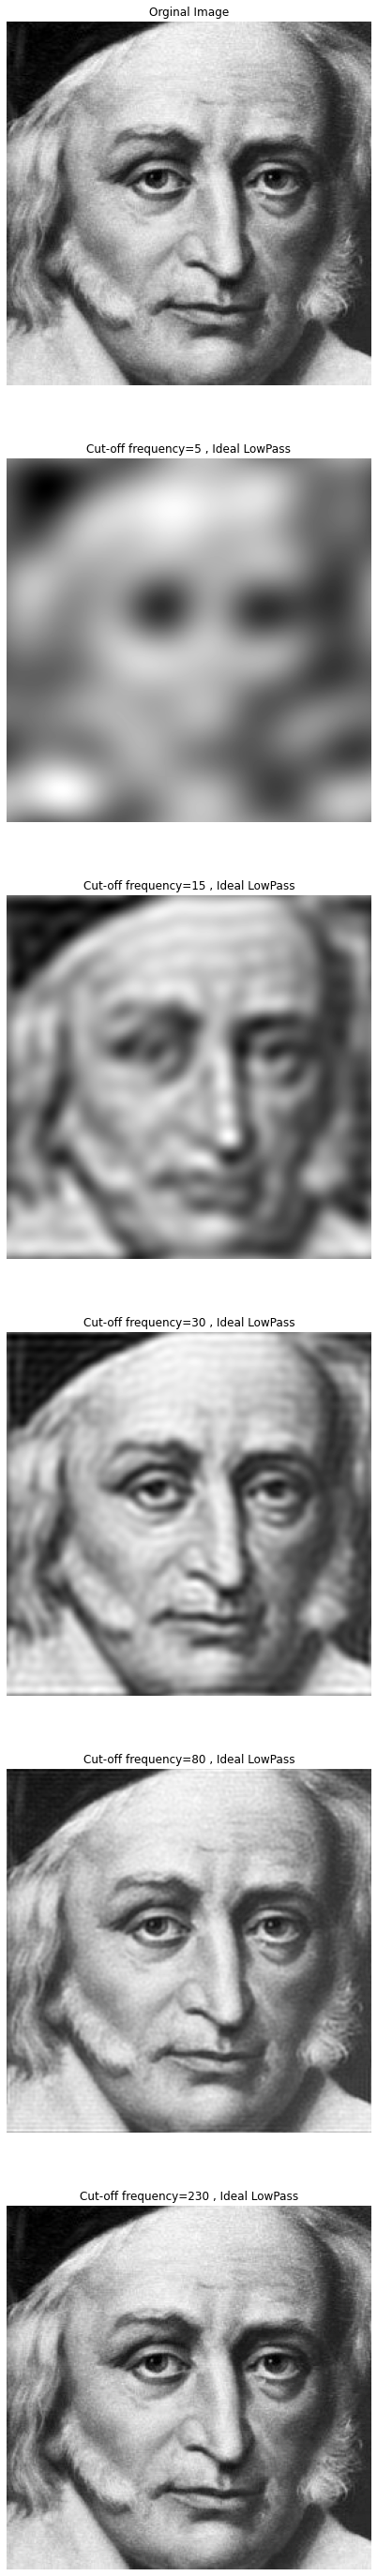

In [90]:
OrginalImage=cv2.imread("GNI.jpg",0)
Cut_off_frequency=[5,15,30,80,230]
plt.figure(figsize=(10,len(Cut_off_frequency)*10))

for index,D0 in enumerate(Cut_off_frequency):
    H=idealFilter(OrginalImage,D0)
    ILPFImg=applyFilter(OrginalImage,H)
    if index==0:
        plt.subplot(len(Cut_off_frequency)+1,1,1)
        plt.title('Orginal Image')
        plt.axis('off')
        plt.imshow(OrginalImage, cmap = 'gray')
        
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Ideal LowPass')
        plt.axis('off')
        plt.imshow(ILPFImg,cmap='gray')
    else:
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Ideal LowPass')
        plt.axis('off')
        plt.imshow(ILPFImg,cmap='gray')


### Ideal High Pass Filter

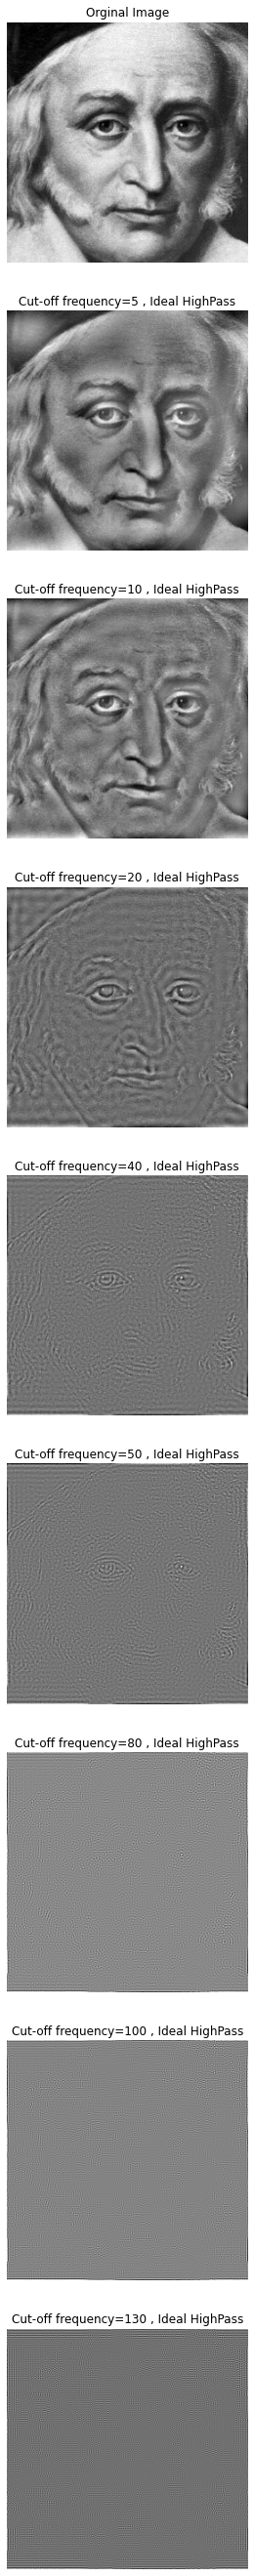

In [89]:
Cut_off_frequency=[5,10,20,40,50,80,100,130]
plt.figure(figsize=(10,len(Cut_off_frequency)*6))
for index,D0 in enumerate(Cut_off_frequency):
    H=idealFilter(OrginalImage,D0,lowpass=False)
    IHPFImg=applyFilter(OrginalImage,H)
    if index == 0:
        plt.subplot(len(Cut_off_frequency)+1,1,1)
        plt.title('Orginal Image')
        plt.axis('off')
        plt.imshow(OrginalImage, cmap = 'gray')
        
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Ideal HighPass')
        plt.axis('off')
        plt.imshow(IHPFImg,cmap='gray')
    else:
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Ideal HighPass')
        plt.axis('off')
        plt.imshow(IHPFImg,cmap='gray')

## Butterworth Filter

In [8]:
def butterWorthFilter(img,D0,n,lowpass=True):
    row,col=img.shape
    rowsIndex=np.zeros((row,col))
    colsIndex=np.zeros((row,col))
    if row == col :
        for i in range(row):
            for j in range(col):
                rowsIndex[i,j]=i
        colsIndex=rowsIndex.T
    else:
        for i in range(row):
            for j in range(col):
                rowsIndex[i,j]=i
                colsIndex[i,j]=j
    D=np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            D[i,j]=np.sqrt(pow((rowsIndex[i,j]-row//2),2)+pow((colsIndex[i,j]-col//2),2))
    if lowpass:
        L=1/(1+(D/D0)**(2*n))
        return L
    else:
        D=np.heaviside(D,0.1)-np.sign(D)+D
        H=1/(1+(D0/D)**(2*n))
        return H

### Butterworth Low Pass Filter

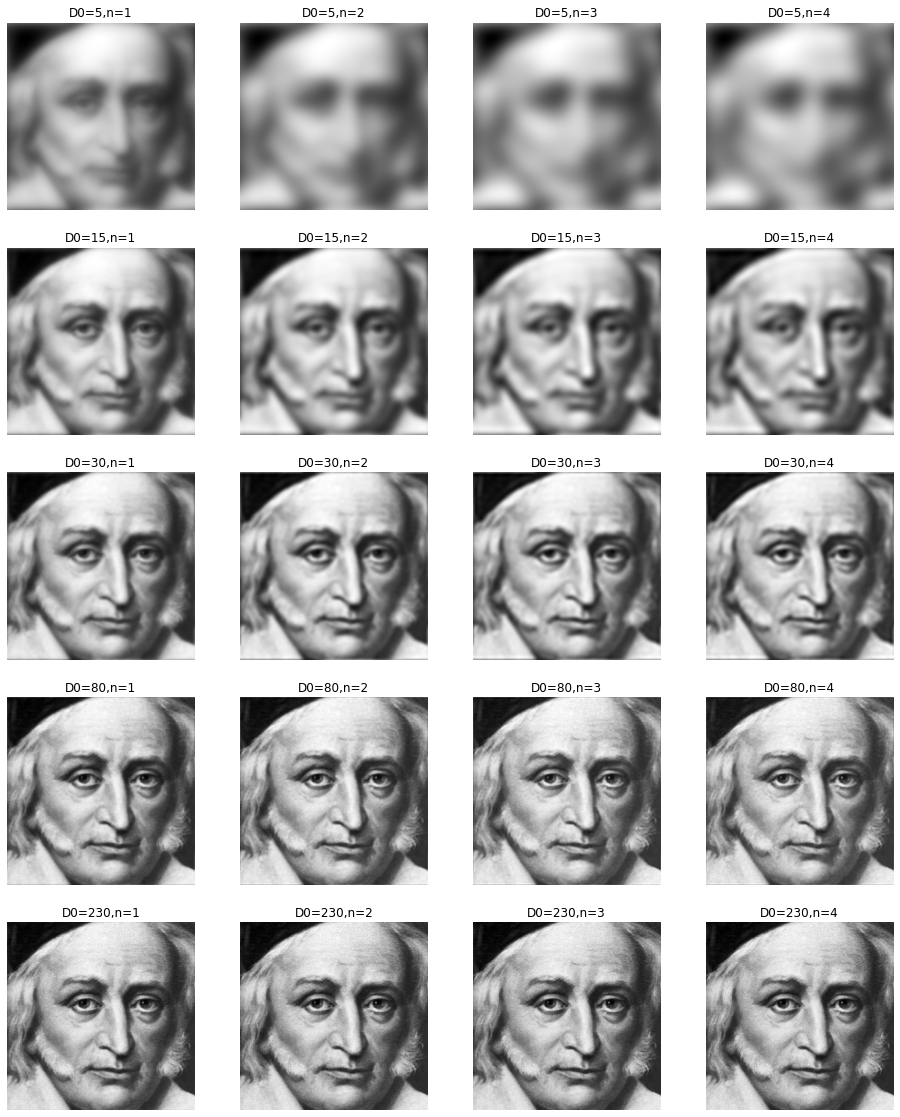

In [74]:
OrginalImage=cv2.imread("GNI.jpg",0)
Cut_off_frequency=[5,15,30,80,230]
orders=[1,2,3,4]
plt.figure(figsize=(len(orders)*4,len(Cut_off_frequency)*4))
for row,D0 in enumerate(Cut_off_frequency):
    for col,n in enumerate(orders):
        plt.subplot(len(Cut_off_frequency),
                    len(orders),
                     row*len(orders)+col+1)
        plt.title(f'D0={D0},n={n}')
        plt.axis('off')
        H=butterWorthFilter(OrginalImage,D0,n)
        BLPFImage=applyFilter(OrginalImage,H)
        plt.imshow(BLPFImage,cmap='gray')

### Butterworth High Pass Filter

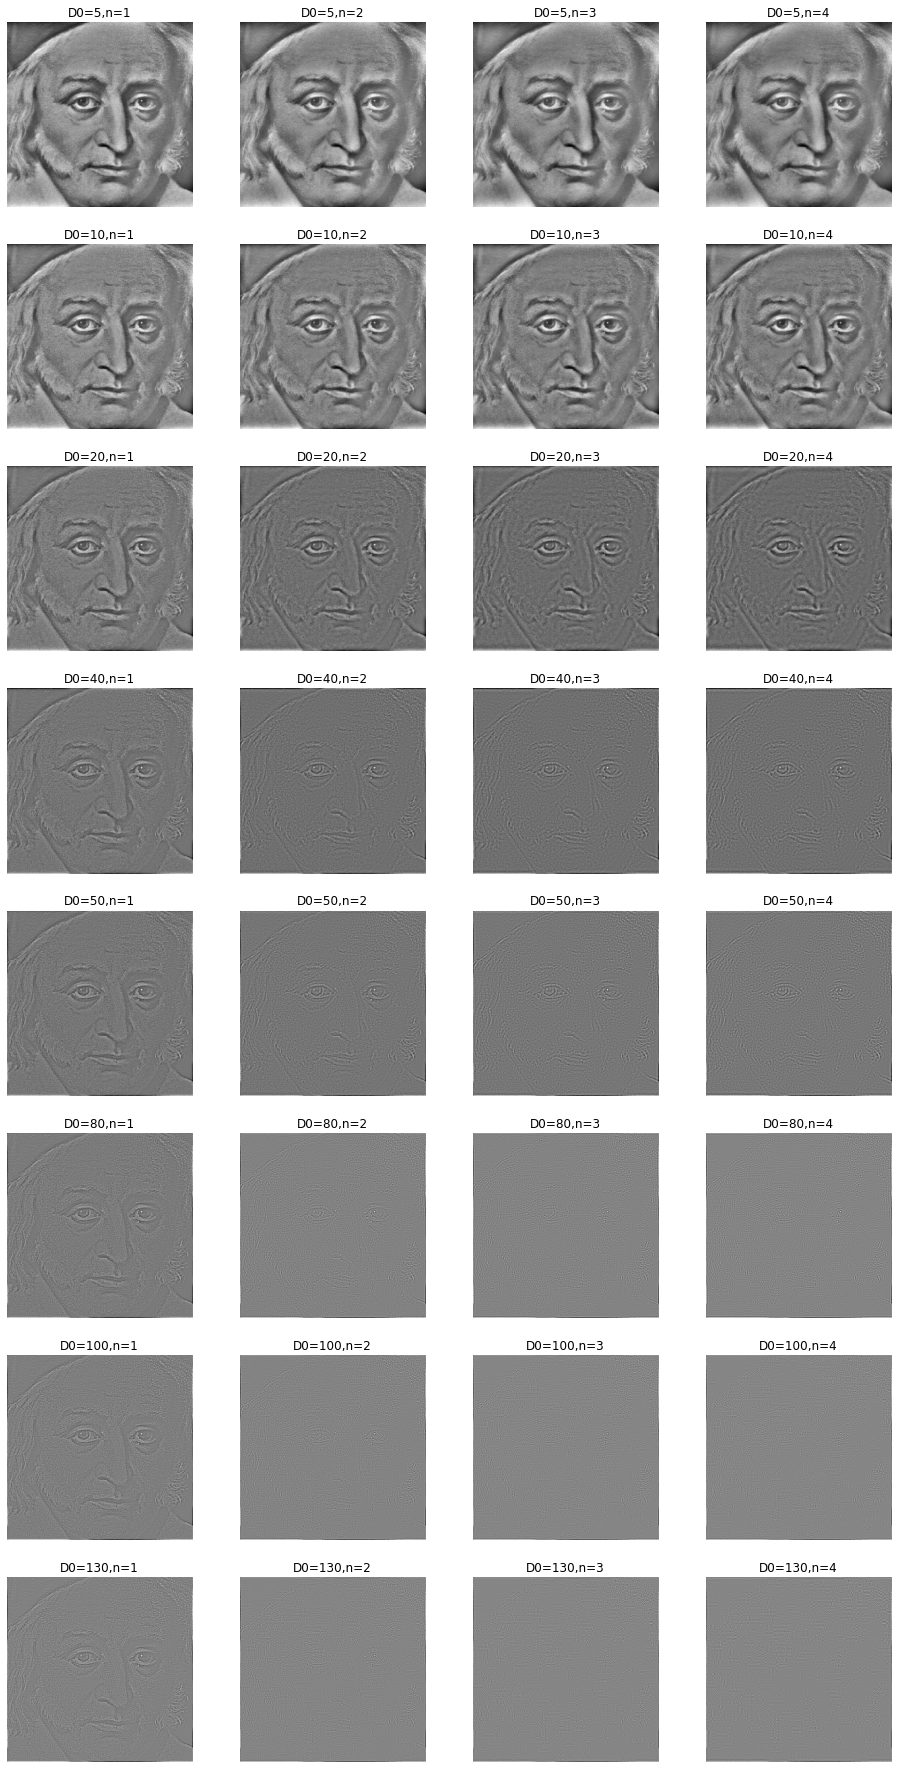

In [76]:
Cut_off_frequency=[5,10,20,40,50,80,100,130]
orders=[1,2,3,4]
plt.figure(figsize=(len(orders)*4,len(Cut_off_frequency)*4))
for row,D0 in enumerate(Cut_off_frequency):
    for col,n in enumerate(orders):
        plt.subplot(len(Cut_off_frequency),
                    len(orders),
                     row*len(orders)+col+1)
        plt.title(f'D0={D0},n={n}')
        plt.axis('off')
        H=butterWorthFilter(OrginalImage,D0,n,lowpass=False)
        BHPFImage=applyFilter(OrginalImage,H)
        plt.imshow(BHPFImage,cmap='gray')

## Gaussian Filter

In [11]:
def GuassianFilter(img,D0,lowpass=True):
    row,col=img.shape
    rowsIndex=np.zeros((row,col))
    colsIndex=np.zeros((row,col))
    if row == col :
        for i in range(row):
            for j in range(col):
                rowsIndex[i,j]=i
        colsIndex=rowsIndex.T
    else:
        for i in range(row):
            for j in range(col):
                rowsIndex[i,j]=i
                colsIndex[i,j]=j
    D=np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            D[i,j]=np.sqrt(pow((rowsIndex[i,j]-row//2),2)+pow((colsIndex[i,j]-col//2),2))
    if lowpass:
        L=pow(math.e,(-1*(pow((D / (2 * D0 )),2))))
        return L
    else:
        H=1-pow(math.e,(-1*(pow((D / (2 * D0 )),2))))
        return H

### Gaussian Low Pass Filter

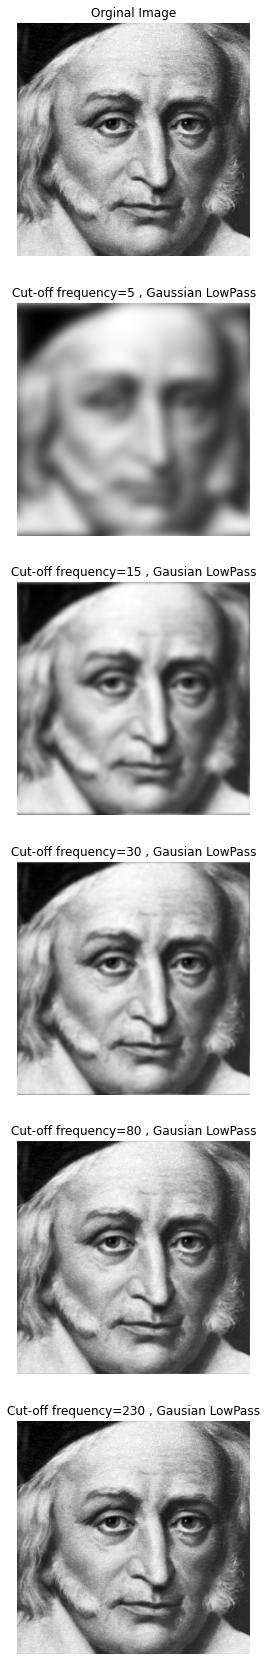

In [88]:
OrginalImage=cv2.imread("GNI.jpg",0)
Cut_off_frequency=[5,15,30,80,230]
plt.figure(figsize=(10,len(Cut_off_frequency)*6))
for index,D0 in enumerate(Cut_off_frequency):
    L= GuassianFilter(GNI,D0)
    GLPFImage=applyFilter(GNI,L)
    if index == 0:
        plt.subplot(len(Cut_off_frequency)+1,1,1)
        plt.title('Orginal Image')
        plt.axis('off')
        plt.imshow(OrginalImage, cmap = 'gray')
        
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Gaussian LowPass')
        plt.axis('off')
        plt.imshow(GLPFImage,cmap='gray')
    else:
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Gausian LowPass')
        plt.axis('off')
        plt.imshow(GLPFImage,cmap='gray')

### Gaussian High Pass Filter

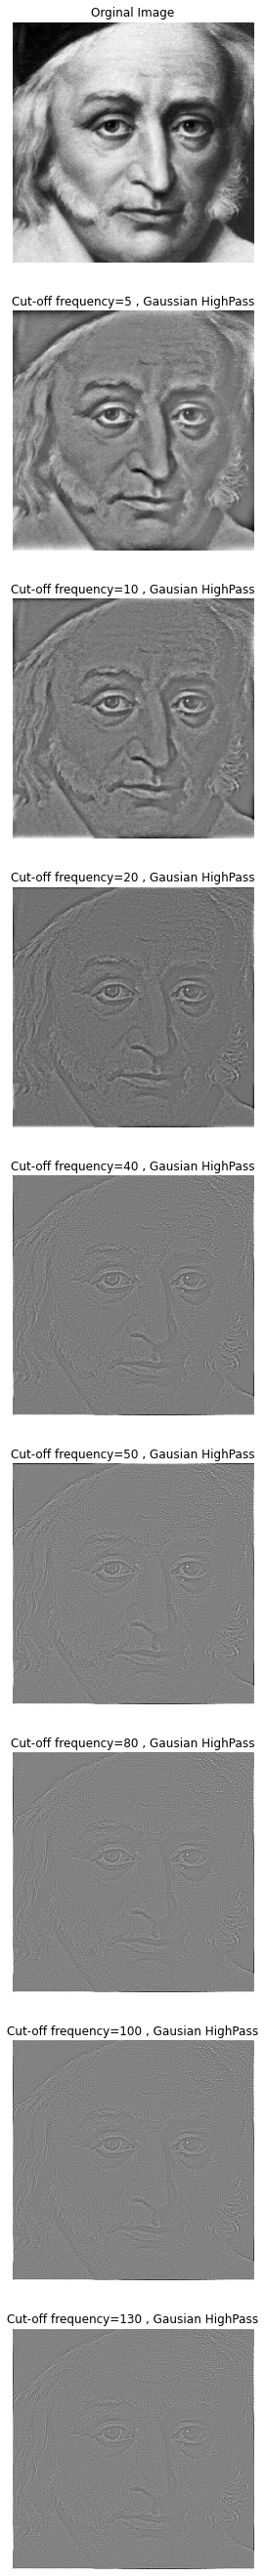

In [87]:
Cut_off_frequency=[5,10,20,40,50,80,100,130]
plt.figure(figsize=(10,len(Cut_off_frequency)*6))
for index,D0 in enumerate(Cut_off_frequency):
    H=GuassianFilter(OrginalImage,D0,lowpass=False)
    GHPFImage=applyFilter(OrginalImage,H)
    if index == 0:
        plt.subplot(len(Cut_off_frequency)+1,1,1)
        plt.title('Orginal Image')
        plt.axis('off')
        plt.imshow(OrginalImage, cmap = 'gray')
        
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Gaussian HighPass')
        plt.axis('off')
        plt.imshow(GHPFImage,cmap='gray')
    else:
        plt.subplot(len(Cut_off_frequency)+1,1,index+2)
        plt.title(f'Cut-off frequency={D0} , Gausian HighPass')
        plt.axis('off')
        plt.imshow(GHPFImage,cmap='gray')

## Laplacian Filter

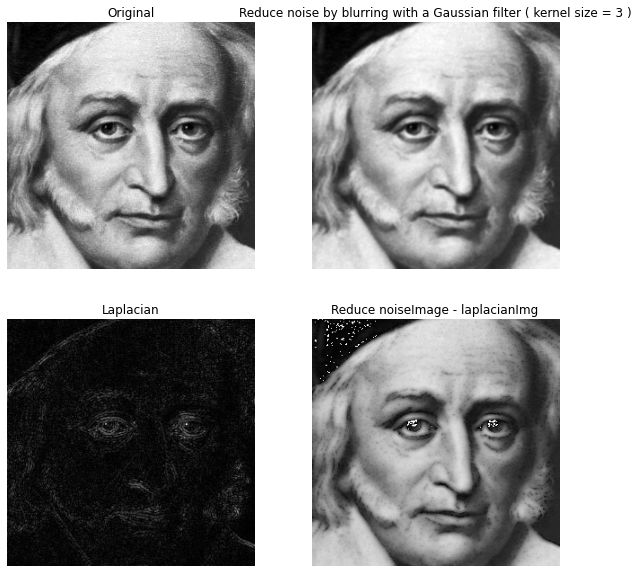

In [71]:
inputImage=cv2.imread('GNI.jpg',0)
RenoiseImage = cv2.GaussianBlur(inputImage, (3, 3), 0)
kernelSize=3
laplacianImg = cv2.Laplacian(RenoiseImage,cv2.CV_64F,kernelSize)
laplacianImg=cv2.convertScaleAbs(laplacianImg)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(inputImage, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(222)
plt.imshow(RenoiseImage, cmap='gray')
plt.title('Reduce noise by blurring with a Gaussian filter ( kernel size = 3 )')
plt.axis('off')
plt.subplot(223)
plt.imshow(laplacianImg, cmap='gray')
plt.title('Laplacian')
plt.axis('off')
plt.subplot(224)
plt.imshow(RenoiseImage-laplacianImg, cmap='gray')
plt.title('Reduce noiseImage - laplacianImg')
plt.axis('off')
plt.show()